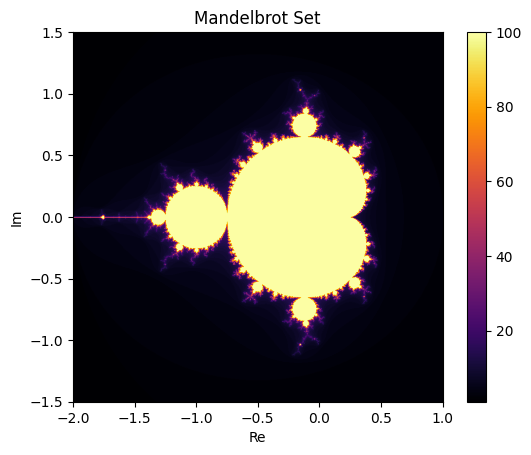

: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the dimensions of the plot
width, height = 800, 800
# Define the range of the complex plane to visualize
re_min, re_max = -2.0, 1.0
im_min, im_max = -1.5, 1.5
# Maximum number of iterations
max_iter = 100

# Create a 2D array to store the iteration counts
mandelbrot_set = np.zeros((height, width))

# Iterate over each pixel
for x in range(width):
    for y in range(height):
        # Convert pixel coordinate to complex number
        c = complex(re_min + (x / width) * (re_max - re_min),
                    im_min + (y / height) * (im_max - im_min))
        z = 0
        iteration = 0
        # Iterate the Mandelbrot function
        while abs(z) <= 2 and iteration < max_iter:
            z = z**2 + c
            iteration += 1
        # Store the iteration count
        mandelbrot_set[y, x] = iteration

# Plot the Mandelbrot set
plt.imshow(mandelbrot_set, extent=(re_min, re_max, im_min, im_max), cmap='inferno')
plt.colorbar()
plt.title("Mandelbrot Set")
plt.xlabel("Re")
plt.ylabel("Im")
plt.show()


### Paper: https://arxiv.org/abs/nlin/0111001?utm_source=chatgpt.com
### Mandelbrot set in coupled logistic maps and in an electronic experiment

### This study explores the manifestation of the Mandelbrot set within coupled logistic maps and their electronic analogs. 

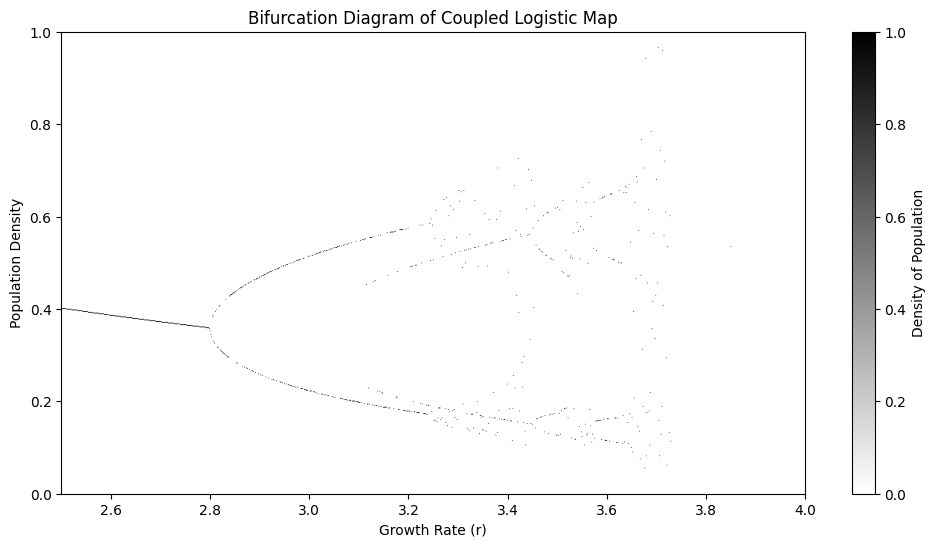

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit, prange

# Define parameters for the coupled logistic map
r_min, r_max = 2.5, 4.0  # Range for bifurcation parameter
num_r_values = 1000       # Number of r values to iterate
iterations = 2000         # Total iterations
last = 200                # Number of iterations to display after reaching steady-state

# Grid resolution
width, height = 1000, 600

@jit(nopython=True, parallel=True)
def coupled_logistic_map(r_values, width, height, iterations, last):
    """
    Compute the bifurcation diagram for coupled logistic maps.
    This function runs in parallel for speed.
    """
    results = np.zeros((height, width))

    for i in prange(width):
        r = r_values[i]  # Growth parameter
        x, y = np.random.rand(), np.random.rand()  # Initial random conditions
        
        # Iterate the logistic maps
        for _ in range(iterations):
            x_new = r * x * (1 - x) + 0.1 * (y - x)  # Coupling term
            y_new = r * y * (1 - y) + 0.1 * (x - y)  
            x, y = x_new, y_new
        
        # Store the final results
        for j in range(last):
            results[int(y * height - 1), i] = 1  # Plot y values

    return results

# Define r values
r_values = np.linspace(r_min, r_max, width)

# Compute bifurcation diagram
bifurcation_data = coupled_logistic_map(r_values, width, height, iterations, last)

# Plot the results
plt.figure(figsize=(12, 6))
plt.imshow(bifurcation_data, extent=[r_min, r_max, 0, 1], cmap="binary", aspect="auto")
plt.colorbar(label="Density of Population")
plt.xlabel("Growth Rate (r)")
plt.ylabel("Population Density")
plt.title("Bifurcation Diagram of Coupled Logistic Map")
plt.show()
